# Logistic Regression

In [1]:
import os

import pandas as pd
import numpy as np

import scipy.optimize as opt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='darkgrid')
%matplotlib inline

In [2]:
PATH_TO_DATA = ''.join([os.getcwd(), '/data/ex2data1.txt'])
df = pd.read_csv(PATH_TO_DATA, names=['Exam1', 'Exam2', 'Admitted'])

In [3]:
df.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.describe()

,Exam1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


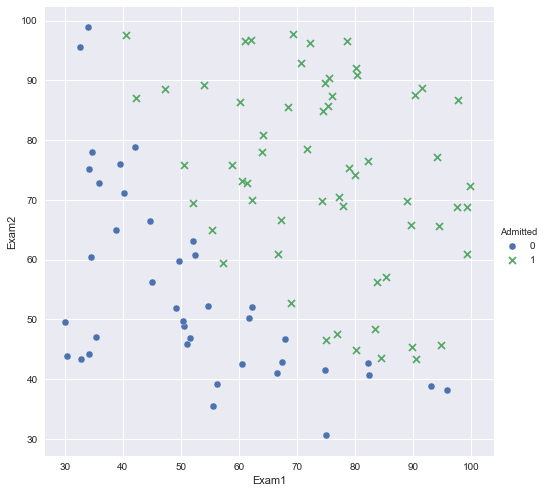

In [5]:
sns.pairplot(x_vars='Exam1', y_vars='Exam2', data=df, hue='Admitted', markers=['o', 'x'], size=7)

In [6]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [7]:
z = np.linspace(-10, 10, 20)

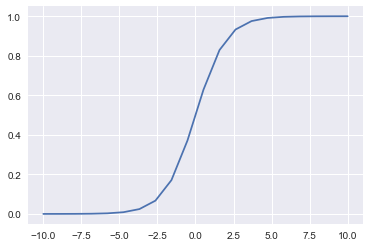

In [8]:
plt.plot(z, sigmoid(z))

In [9]:
X = df[['Exam1', 'Exam2']]
y = df[['Admitted']]

In [10]:
# Add Intercept term to the set of features X
X.insert(0, 'Intercept', 1)

In [11]:
# Convert from Pandas DataFrames to NumPy arrays.
X = np.array(X)
y = np.array(y)
y = y.ravel()

print('X shape: {}\ny shape: {}'.format(X.shape, y.shape))

X shape: (100, 3)
y shape: (100,)


In [12]:
# Number of training examples
m = X.shape[0]

# Number of features
n = X.shape[1]

In [13]:
# Initialise fitting parameters (weights)
theta_initial = np.zeros(n)

print('theta_initial shape: {}'.format(theta_initial.shape))

theta_initial shape: (3,)


## Compute the cost function

In [14]:
def compute_cost(theta, X, y):
    predictions = sigmoid(np.dot(X, theta))
    errors = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))
    J = 1 / m * np.sum(errors)
    return(J)

In [15]:
compute_cost(theta_initial, X, y)

0.6931471805599453

## Compute the gradient

In [16]:
def compute_gradient(theta, X, y):
    grad = np.zeros(n)
    predictions = sigmoid(np.dot(X, theta))
    errors = predictions - y
    grad = 1 / m * np.dot(X.T, errors)
    return(grad)

In [17]:
compute_gradient(theta_initial, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

## Use the fmin_tnc (Newton Conjugate-Gradient) algorithm to optimise our weights

In [18]:
result = opt.fmin_tnc(func=compute_cost, x0=theta_initial, fprime=compute_gradient, args=(X, y))
result

(array([-25.16131856,   0.20623159,   0.20147149]), 36, 0)

## Compute cost with the optimised (learned parameter) theta

In [19]:
theta_optimised = result[0]
cost_optimised = compute_cost(theta_optimised, X, y)
print("Optimised Cost: {}".format(cost_optimised))

Optimised Cost: 0.2034977015894749


## Predict

In [20]:
def predict(theta, X):
    threshold = 0.5
    probabilities = sigmoid(np.dot(X, theta.T))
    return([1 if probability >= threshold else 0 for probability in probabilities])

In [21]:
predictions = predict(theta_optimised, X)

In [22]:
print("Accuracy = {}".format(sum([1 if a == b else 0 for (a,b) in zip(predictions, y)]) / X.shape[0]))

Accuracy = 0.89


# Regularised Logistic Regression

In [23]:
PATH_TO_DATA = ''.join([os.getcwd(), '/data/ex2data2.txt'])
df = pd.read_csv(PATH_TO_DATA, names=['Microchip_test1', 'Microchip_test2', 'Accepted'])

In [24]:
df.head()

,Microchip_test1,Microchip_test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [25]:
df.describe()

,Microchip_test1,Microchip_test2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


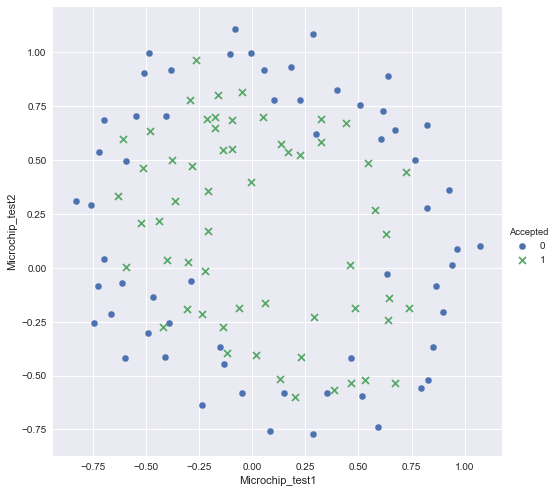

In [26]:
sns.pairplot(x_vars='Microchip_test1', y_vars='Microchip_test2', data=df, hue='Accepted', markers=['o', 'x'], size=7)

In [27]:
X = df[['Microchip_test1', 'Microchip_test2']]
y = df[['Accepted']]
X.insert(0, 'Intercept', 1)

In [28]:
# Create some polynomial features.
poly_degree = 6

for i in range(1, poly_degree):
    for j in range(i):
        X['Feature' + str(i) + str(j)] = np.power(X['Microchip_test1'], i - j) * np.power(X['Microchip_test2'], j)

X.drop(['Microchip_test1', 'Microchip_test2'], axis=1, inplace=True)

/Users/iulian/valkyrie/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/iulian/valkyrie/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
X.head()

,Intercept,Feature10,Feature20,Feature21,Feature30,Feature31,Feature32,Feature40,Feature41,Feature42,Feature43,Feature50,Feature51,Feature52,Feature53,Feature54
0,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551,3.541519e-07,0.000005,0.000066,0.000900,0.012278
1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801,-6.860919e-06,0.000051,-0.000374,0.002764,-0.020412
2,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895,-4.457837e-04,0.001444,-0.004677,0.015151,-0.049077
3,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494,-7.415771e-03,0.009931,-0.013299,0.017810,-0.023851
4,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818,-3.561597e-02,0.032312,-0.029315,0.026596,-0.024128


### Regularised Cost function

In [30]:
def compute_cost_regularised(theta, X, y, reg_lambda):
    predictions = sigmoid(np.dot(X, theta))
    errors = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))
    reg_term = reg_lambda / (2 * m) * np.sum(np.power(theta[1:n], 2)) # theta_0 (bias) is intentionally excluded
    J = 1 / m * np.sum(errors) + reg_term
    return(J)

### Regularised Gradient function

In [31]:
def compute_gradient_regularised(theta, X, y, reg_lambda):
    grad = np.zeros(n)
    predictions = sigmoid(np.dot(X, theta))
    errors = predictions - y
    grad = 1 / m * np.dot(X.T, errors) + ((reg_lambda / m) * theta)
    grad[0] = 1 / m * np.sum(errors * X[:,0]) # don't regularise the bias
    return(grad)

In [32]:
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})

In [33]:
# Convert from Pandas DataFrames to NumPy arrays
X = np.array(X)
y = np.array(y)
y = y.ravel()

print('X shape: {}\ny shape: {}'.format(X.shape, y.shape))

X shape: (118, 16)
y shape: (118,)


In [34]:
# Number of training examples
m = X.shape[0]

# Number of features
n = X.shape[1]

In [35]:
# Initialise fitting parameters (weights)
theta_initial = np.ones(n)

# Initialise the regularisation parameter
reg_lambda = 1

print('theta_initial shape: {}'.format(theta_initial.shape))

theta_initial shape: (16,)


## Compute cost and gradient

In [36]:
cost = compute_cost_regularised(theta_initial, X, y, reg_lambda)
grad = compute_gradient_regularised(theta_initial, X, y, reg_lambda)

print("Cost: {}\n\nGradient:\n{}".format(cost, grad))

Cost: 1.401485326055069

Gradient:
[ 0.26512  0.11193  0.13712  0.03253  0.07489  0.02164  0.04017  0.09263
  0.01525  0.03539  0.02015  0.06197  0.01563  0.02064  0.01776  0.02489]


## Use the fmin_tnc (Newton Conjugate-Gradient) algorithm to optimise our weights

In [37]:
result = opt.fmin_tnc(func=compute_cost_regularised, x0=theta_initial, fprime=compute_gradient_regularised, args=(X, y, reg_lambda))
theta_optimised = result[0]
print("Optimised theta: \n{}".format(theta_optimised))

Optimised theta: 
[ 0.53462  0.33170 -1.57909 -0.54894  0.07829 -0.16778 -0.38868 -1.33692
  0.04007 -0.92990  0.05654 -0.29872 -0.09103 -0.08586 -0.43850 -0.20351]


## Compute cost with the optimised (learned parameter) theta

In [38]:
cost_optimised = compute_cost_regularised(theta_optimised, X, y, reg_lambda)

print("Optimised Cost: {}".format(cost_optimised))

Optimised Cost: 0.6211087016248658


## Predict

In [39]:
predictions = predict(theta_optimised, X)

In [40]:
print("Accuracy = {}".format(sum([1 if a == b else 0 for (a,b) in zip(predictions, y)]) / X.shape[0]))

Accuracy = 0.6694915254237288
